In [26]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score  
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image


sklearn.__version__

'0.24.2'

- 분류모델 성능 평가를 위한 이해

In [28]:

print('TP(target = 1 , predict = 1)')
print('TN(target = 0 , predict = 0)')
print('FN(target = 1 , predict = 0) -> Type I error')
print('FP(target = 0 , predict = 1) -> Type 2 error')

target     = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
prediction = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

tp = tn = fn = fp = 0 

for idx in range(len(target)) :
    if target[idx] == 1 and prediction[idx] == 1 :
        tp += 1 
    if target[idx] == 0 and prediction[idx] == 0 :
        tn += 1
    if target[idx] == 1 and prediction[idx] == 0 :
        fn += 1
    if target[idx] == 0 and prediction[idx] == 1 :
        fp += 1 
        
print()
print('TP(target = 1 , predict = 1) - ' , tp)
print('TN(target = 0 , predict = 0) - ' , tn)
print('FN(target = 1 , predict = 0) -> Type I error - ' , fn)
print('FP(target = 0 , predict = 1) -> Type 2 error - ' , fp)

TP(target = 1 , predict = 1)
TN(target = 0 , predict = 0)
FN(target = 1 , predict = 0) -> Type I error
FP(target = 0 , predict = 1) -> Type 2 error

TP(target = 1 , predict = 1) -  3
TN(target = 0 , predict = 0) -  0
FN(target = 1 , predict = 0) -> Type I error -  4
FP(target = 0 , predict = 1) -> Type 2 error -  3


In [30]:
print('confusion matrix \n' , confusion_matrix(target , prediction))
print()
print('accuracy \n' , accuracy_score(target , prediction))
print()
print('recall \n'   , recall_score(target , prediction))
print()
print('precision \n'   , precision_score(target , prediction))
print()
print('f1 score \n'   , f1_score(target , prediction))

confusion matrix 
 [[0 3]
 [4 3]]

accuracy 
 0.3

recall 
 0.42857142857142855

precision 
 0.5

f1 score 
 0.4615384615384615


In [32]:
'''
요구사항) 
제품을 생산하는 공장에서 품질 테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다

테스트 결과 양성 -> 불량품
            음성 -> 정상제품

TP : 실제 불량을 불량으로 예측
TN : 실제 정상을 정상으로 예측
FN : 실제 불량을 정상으로 예측
FP : 실제 정상을 불량으로 예측

                   불량예측           정상예측
불량품               TP                 FN
정상제품             FP                 TN

정밀도(Precision) : TP / ( TP + FP )
-> 예측을 Positive 로 한 대상 중에 예측과 실제값이 Positive 로 일치하는 데이터의 비율
재현율(Recall)    : TP / ( TP + FN ) 
-> 실제값이 Positive 인 대상 중에 예측과 실제값이 Positive 로 일치한 데이터의 비율

- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸매일
- 상대적으로 재현율이 더 중요한 지표인 경우 : 의학(암 진단) , 금융(사기 판별)
'''        

'\n요구사항) \n제품을 생산하는 공장에서 품질 테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다\n\n테스트 결과 양성 -> 불량품\n            음성 -> 정상제품\n\nTP : 실제 불량을 불량으로 예측\nTN : 실제 정상을 정상으로 예측\nFN : 실제 불량을 정상으로 예측\nFP : 실제 정상을 불량으로 예측\n\n                   불량예측           정상예측\n불량품               TP                 FN\n정상제품             FP                 TN\n\n정밀도(Precision) : TP / ( TP + FP )\n-> 예측을 Positive 로 한 대상 중에 예측과 실제값이 Positive 로 일치하는 데이터의 비율\n재현율(Recall)    : TP / ( TP + FN ) \n-> 실제값이 Positive 인 대상 중에 예측과 실제값이 Positive 로 일치한 데이터의 비율\n\n- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸매일\n- 상대적으로 재현율이 더 중요한 지표인 경우 : 의학(암 진단) , 금융(사기 판별)\n'

In [44]:
titanic_frm = pd.read_csv('C:/Users/crid2/ml-data/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 - 타이타닉에서 여성의 생존이 남성의 생존보다 높으므로 분류알고리즘의 정확도로 성능을 평가하면 모델의 성능은 왜곡될 수 있다.


In [36]:
class UserEstimator(BaseEstimator) : 
    def fit(self , X , y = None ) :
        pass
    
    def predict(self , X) :
        pred = np.zeros( (X.shape[0] , 1))
        for idx in range(X.shape[0]) :
            if X['Sex'].iloc[idx] == 1 :
                pred[idx] = 0
            else :
                pred[idx] = 1
        
        return pred

In [38]:
print('불필요한 피처 삭제 - ')
def drop_features(frm) : 
    
    frm.drop(['PassengerId' , 'Name' , 'Ticket'] , axis = 1 , inplace = True )
    return frm 

print('결측값 처리  - ')
def pre_processing(frm) : 

    titanic_age_imputer = SimpleImputer(strategy = 'mean')

    frm['Age']  = titanic_age_imputer.fit_transform(frm[['Age']])
    frm['Cabin'].fillna('N' , inplace = True ) 
    frm['Embarked'] =  frm['Embarked'].fillna('N')

    return frm 

print('레이블 인코딩 -')
def label_encoder(frm) : 
    
    frm['Cabin'] = frm['Cabin'].str[:1]
    
    features = ['Sex' , 'Cabin' , 'Embarked']
    
    for f in features :
        le = LabelEncoder()
        le = le.fit(frm[f])
        frm[f] = le.transform(frm[f])
    
    return frm 


def transform_features(frm) :
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    
    return frm 

불필요한 피처 삭제 - 
결측값 처리  - 
레이블 인코딩 -


In [46]:
titanic_target   = titanic_frm['Survived']
titanic_features = titanic_frm.drop(['Survived'] , axis = 1) 

print('type - ' , type(titanic_target)) 
print('type - ' , type(titanic_features)) 

type -  <class 'pandas.core.series.Series'>
type -  <class 'pandas.core.frame.DataFrame'>


In [47]:
clean_features = transform_features(titanic_features)


In [49]:
clean_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [52]:
X_train , X_test , y_train , y_test = train_test_split(titanic_features , 
                                                       titanic_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)


In [54]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((712, 8), (179, 8), (712,), (179,))

In [56]:
user_model = UserEstimator()

user_model.fit(X_train, y_train)
user_pred = user_model.predict(X_test)

print('user model accuracy - ' , accuracy_score(y_test , user_pred))

user model accuracy -  0.7877094972067039


In [58]:
def metrics_evaluation(target , prediction) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('accuracy \n' , accuracy_score(target , prediction))
    print()
    print('recall \n'   , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))

In [60]:
metrics_evaluation(y_test , user_pred)

confusion matrix 
 [[88 16]
 [22 53]]

accuracy 
 0.7877094972067039

recall 
 0.7066666666666667

precision 
 0.7681159420289855

f1 score 
 0.736111111111111


In [62]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


metrics_evaluation(y_test , lr_pred)

confusion matrix 
 [[90 14]
 [21 54]]

accuracy 
 0.8044692737430168

recall 
 0.72

precision 
 0.7941176470588235

f1 score 
 0.7552447552447551


In [64]:
print('acc - ' , (90+54) / (90+14+21+54) ) 
print('실제 True 를 True 예측  recall    - ' , (54) / (54+21) )
print('예측 True 를 실제 True  precision - ' , (54) / (54+14) )

acc -  0.8044692737430168
실제 True 를 True 예측  recall    -  0.72
예측 True 를 실제 True  precision -  0.7941176470588235


In [66]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [68]:
cancer_frm = pd.DataFrame(data    = cancer.data , 
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [69]:
print('암 관련 데이터 - 재현율(실제 P 를 N 예측하면 안된다...)')
print('재현율은 실제 양섯을 양성으로 예측한 비율이 높아야 좋은 모델로 판단할 수 있다. - ') 

암 관련 데이터 - 재현율(실제 P 를 N 예측하면 안된다...)
재현율은 실제 양섯을 양성으로 예측한 비율이 높아야 좋은 모델로 판단할 수 있다. - 


In [83]:
print('데이터의 균형여부 판단이 중요하다!! ')
cancer_frm['target'].value_counts()

데이터의 균형여부 판단이 중요하다!! 


1    357
0    212
Name: target, dtype: int64

In [84]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , 
                                                       cancer.target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((455, 30), (114, 30), (455,), (114,))

In [85]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train , y_train)
y_pred = rf_model.predict(X_test) 
metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[46  3]
 [ 2 63]]

accuracy 
 0.956140350877193

recall 
 0.9692307692307692

precision 
 0.9545454545454546

f1 score 
 0.9618320610687022


In [86]:
print('교차검증 - GridSearchCV ')
print('RandomForestClassifier - parameter')
print('n_estimators - 생성할 tree estimator 갯수 ') 
print('max_features - 최대 선택할 피처의 수를 의미 ') 
print('max_depth    - 생성할 tree의 깊이 ') 

교차검증 - GridSearchCV 
RandomForestClassifier - parameter
n_estimators - 생성할 tree estimator 갯수 
max_features - 최대 선택할 피처의 수를 의미 
max_depth    - 생성할 tree의 깊이 


In [87]:
params = {
    'n_estimators' : [200, 300] , 
    'max_features' : [6, 8, 15, 20] , 
    'max_depth'    : [4, 6, 8]
}

grid_rf_model = GridSearchCV(rf_model , 
                             param_grid = params , 
                             cv = 20 , 
                             refit   = True , 
                             scoring = 'recall' ) 

In [88]:
grid_rf_model.fit(X_train , y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [6, 8, 15, 20],
                         'n_estimators': [200, 300]},
             scoring='recall')

In [89]:
print('최적 파라미터 - ' , grid_rf_model.best_params_ )
print('최고 recall 점수     - ' , grid_rf_model.best_score_ )
estimator = grid_rf_model.best_estimator_
estimator

y_pred = estimator.predict(X_test)

최적 파라미터 -  {'max_depth': 8, 'max_features': 8, 'n_estimators': 300}
최고 recall 점수     -  0.9830952380952382


In [91]:
''' confusion matrix

                   Prediction
               False      True
        False   TN         FP   :
                                :
Actual                          :  precision
                                :
        True    FN         TP   : 
        <-     recall       -> 
'''
metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[45  4]
 [ 1 64]]

accuracy 
 0.956140350877193

recall 
 0.9846153846153847

precision 
 0.9411764705882353

f1 score 
 0.962406015037594


#### 정밀도 / 재현율의 트레이드오프

- 정밀도와 재현율은 상호 보완관계다
- threshold 조절해서 특정 평가지표를 높일 수 있다.
- Binarizer - fit_transform()
- 임계값이 낮아질수록 Positive 예측할 확률이 높아지므로 재현율이 증가
- predict_proba() : 개별레이블별 예측확률이 반환된다.

In [94]:
matrix = [
    [-1, -1, 2] , 
    [2, 0, 0] , 
    [0, 1.1 , 0.6]  
]

In [95]:
user_th = Binarizer(threshold = 1.1)
print(user_th.fit_transform(matrix) )

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [97]:
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
titanic_target   = titanic_frm['Survived']
titanic_features = titanic_frm.drop(['Survived'] , axis = 1 ) 

In [100]:
subset_features = transform_features(titanic_features)
subset_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [101]:
X_train , X_test , y_train , y_test = train_test_split(subset_features , 
                                                       titanic_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((712, 8), (179, 8), (712,), (179,))

In [102]:
logistic_model = LogisticRegr

ession()

logistic_model.fit(X_train , y_train) 
y_pred = logistic_model.predict(X_test) 

metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[90 14]
 [21 54]]

accuracy 
 0.8044692737430168

recall 
 0.72

precision 
 0.7941176470588235

f1 score 
 0.7552447552447551


In [103]:
print('확률예측 값 - predict_proba() ') 

predict_proba_result = logistic_model.predict_proba(X_test)
print('type  - ' , type(predict_proba_result))
print('shape - ' , predict_proba_result.shape)
print()
print('type  - ' , type(y_pred))
print('shape - ' , y_pred.shape)

확률예측 값 - predict_proba() 
type  -  <class 'numpy.ndarray'>
shape -  (179, 2)

type  -  <class 'numpy.ndarray'>
shape -  (179,)


In [105]:
print('예측값과 예측확률값의 병합 - ') 
pred_prob_concat =  np.concatenate( [ predict_proba_result , y_pred.reshape(-1, 1) ] , axis = 1)
pred_prob_concat                 

예측값과 예측확률값의 병합 - 


array([[0.16620951, 0.83379049, 1.        ],
       [0.26645451, 0.73354549, 1.        ],
       [0.8965249 , 0.1034751 , 0.        ],
       [0.40388898, 0.59611102, 1.        ],
       [0.86336574, 0.13663426, 0.        ],
       [0.25824152, 0.74175848, 1.        ],
       [0.8998477 , 0.1001523 , 0.        ],
       [0.78226965, 0.21773035, 0.        ],
       [0.05887811, 0.94112189, 1.        ],
       [0.63210508, 0.36789492, 0.        ],
       [0.02405766, 0.97594234, 1.        ],
       [0.87532477, 0.12467523, 0.        ],
       [0.87015061, 0.12984939, 0.        ],
       [0.57103512, 0.42896488, 0.        ],
       [0.40777887, 0.59222113, 1.        ],
       [0.82491438, 0.17508562, 0.        ],
       [0.06498018, 0.93501982, 1.        ],
       [0.5988419 , 0.4011581 , 0.        ],
       [0.65653673, 0.34346327, 0.        ],
       [0.87057051, 0.12942949, 0.        ],
       [0.90671916, 0.09328084, 0.        ],
       [0.04196019, 0.95803981, 1.        ],
       [0.

In [107]:
print('threshold 0.5 (default) - ') 
print()
metrics_evaluation(y_test , y_pred)

threshold 0.5 (default) - 

confusion matrix 
 [[90 14]
 [21 54]]

accuracy 
 0.8044692737430168

recall 
 0.72

precision 
 0.7941176470588235

f1 score 
 0.7552447552447551


In [109]:
print('positive value - ')
predict_proba_positive = predict_proba_result[ :  , 1].reshape(-1, 1)

user_th = 0.3
user_th_pred = Binarizer(threshold = user_th).fit_transform(predict_proba_positive)

print('user th 0.3 - ') 
metrics_evaluation(y_test , user_th_pred)

positive value - 
user th 0.3 - 
confusion matrix 
 [[84 20]
 [17 58]]

accuracy 
 0.7932960893854749

recall 
 0.7733333333333333

precision 
 0.7435897435897436

f1 score 
 0.7581699346405228


- trade-off 시각화
- precision_recall_curve(실제값 , 예측확률 값) : 임계값 변화에 따른 평가지표 값을 반환(배열)
- 반환값 : 정밀도, 재현율, 임계 값

In [144]:
predict_proba_positive = predict_proba_result[ :  , 1]
# predict_proba_positive
p, r, th = precision_recall_curve(y_test , predict_proba_positive)
print('p  shape - ' , p.shape)
print('r  shape - ' , r.shape)
print('th shape - ' , th.shape)

p  shape -  (149,)
r  shape -  (149,)
th shape -  (148,)


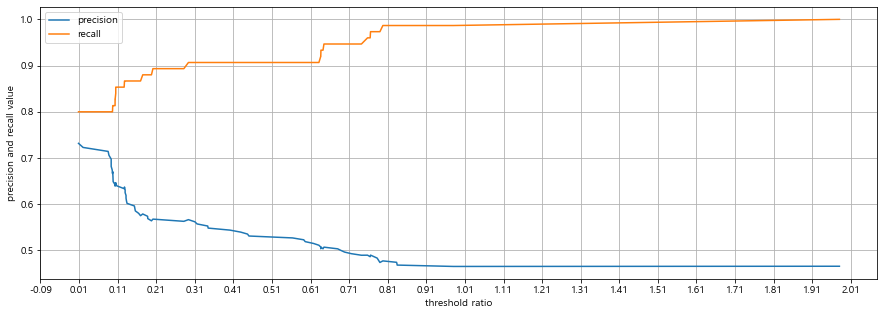

In [143]:
plt.figure( figsize = (15, 5))


plt.plot(th , p[0 : th.shape[0] ] , label = 'precision')
plt.plot(th , r[0 : th.shape[0] ] , label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')

start , end = plt.xlim()
plt.xticks( np.round( np.arange(start , end , 0.1) , 2) )

plt.grid(True)
plt.legend(loc='best')
plt.show()
plt.close()

ROC 곡선과 AUC

- FPR(False Positive Rate) : 실제 Negative 중 Positive로 잘못 예측한 비율
- TPR(True Positive Rate) : 실제 Positive 중 Positive로 예측한 비율
- FPR이 변할 때 TPR 어떻게 변하는지 나타내는 곡선
- FPR -> x축 , TPR -> y축

In [137]:
predict_proba_positive = predict_proba_result[ :  , 1]
predict_proba_positive.shape

(179,)

In [138]:
fprs, tprs, th = roc_curve(y_test , predict_proba_positive)
fprs.shape  , tprs.shape , th.shape

((70,), (70,), (70,))

In [139]:
print('sample idx - ') 
thr_idx = np.arange(1, th.shape[0] , 6)
thr_idx 

sample idx - 


array([ 1,  7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67])

In [140]:
fprs[thr_idx] 

array([0.        , 0.02884615, 0.06730769, 0.08653846, 0.13461538,
       0.18269231, 0.28846154, 0.35576923, 0.49038462, 0.65384615,
       0.73076923, 0.82692308])

In [141]:
tprs[thr_idx]

array([0.01333333, 0.36      , 0.48      , 0.64      , 0.72      ,
       0.76      , 0.81333333, 0.85333333, 0.88      , 0.92      ,
       0.96      , 1.        ])

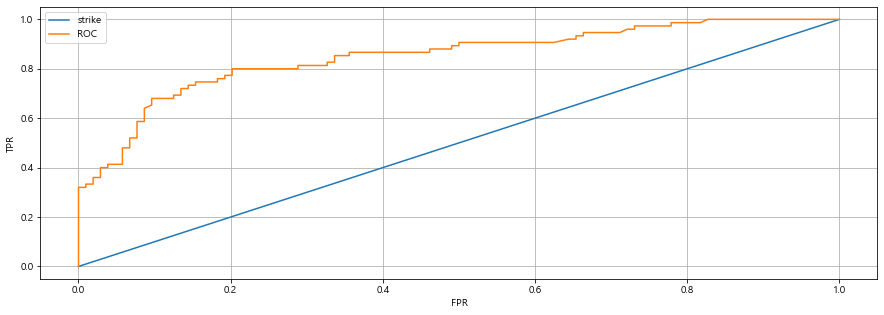

In [142]:
plt.figure( figsize = (15, 5))


plt.plot([0,1] , [0,1] , label = 'strike')
plt.plot(fprs , tprs , label = 'ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.grid(True)
plt.legend(loc='best')
plt.show()
plt.close()

In [135]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train , y_train) 
y_pred = logistic_model.predict(X_test) 
roc_score = roc_auc_score(y_test , y_pred) 
acc_score = accuracy_score(y_test , y_pred) 
print('ROC AUC - ' , roc_score)
print('Acc - ' , acc_score)

ROC AUC -  0.7926923076923077
Acc -  0.8044692737430168
